# `Matplotlib` 資料視覺化

`matplotlib` 幾乎是標準 Python 畫圖套件了! 在有 `matplotlib` 之前, Python 要畫圖不那麼方便, 和 Python 很多套件一樣, 有許多方案, 但各家有不同的優缺點, 也沒有一套是大家都在用的。

而 `matplotlib` 仿 Matlab 式的畫圖方式, 讓很多人很快入手、並且功能相當完整。原作者是 John D. Hunter, 和很多 Python 的套件作者一樣, 他有博士學位。非常令人遺憾的是他在 2012 年因大腸直腸癌治療併發症過逝, 過逝時才 44 歲!


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1 畫個函數

前面說過 `plt.plot` 的基本用法是

    plt.plot(X,Y)

其中 X, Y 是分別是點 x 座標, y 座標形的的 list 或 array。

### 【重點】標準函數畫法

函數畫圖其實就是描點法, 而且再次用到陣列導向計算的概念。

我們先牛刀小試, 畫個 $\sin$ 的圖。

$$f(x) = \sin(x)$$

先來設個 x 的範圍, 就 -10 到 10, 給 100 個點。

In [3]:
x = np.linspace(-10, 10, 100)

y 自然是 $\sin(x)$。

In [9]:
y = np.sin(x)#real graph

畫圖!

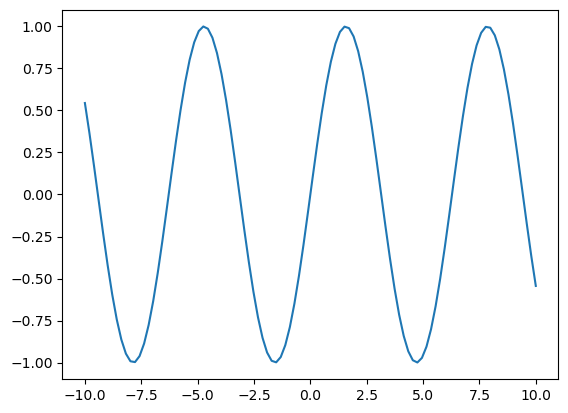

In [6]:
plt.plot(x, y)

### 【練習】函數畫圖

這次我們來畫:

$$f(x) = \frac{\sin(5x)}{1+x^2}$$

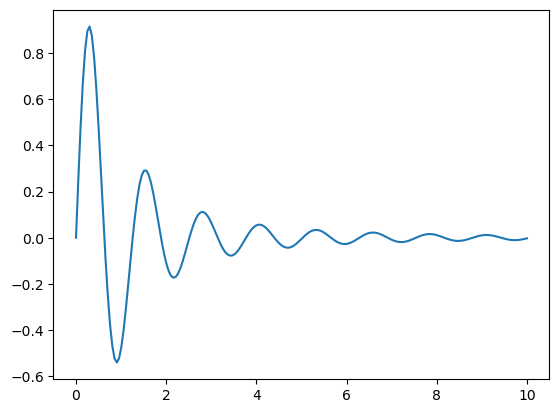

In [16]:
x = np.linspace(0, 10, 200)
y = np.sin(5*x)/(1+x*x)
plt.plot(x, y)

## 2 快速改變風格

雖然 `matplotlib` 在很辛苦的調校之後也是可以畫美美的圖, 不過它比較是「讓我們快速看到結果」的套件。所以它有些快速基本修飾功能。

### 【技巧】快速改變顏色

![快取色彩](images/color.png)

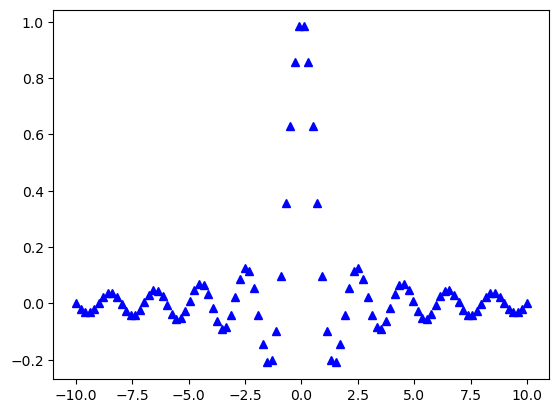

In [22]:
x = np.linspace(-10, 10, 100)
y = np.sinc(x)

plt.plot(x, y, 'b^')

### 【技巧】快速改變線條風格

快速改變線條風格, 還可和顏色混用。

| 參數 | 說明 |
|---|---|
| `--` | dash |
| `-.` | 點 + dash |
| `:` | 點點 |
| `o` | 大點點 |
| `^` | 三角 |
| `s` | 方塊 |

In [ ]:
x = plt.linplot(-10, 10, 100)
plt.plot(x, y, 'b')

## 3 基本的修飾

| 參數 | 說明 |
|---|---|
| `alpha` | 透明度 |
| `color` (`c`)| 顏色 |
| `linestyle` (`ls`) | 線條風格 |
| `linewidth` (`lw`) | 線寬 |

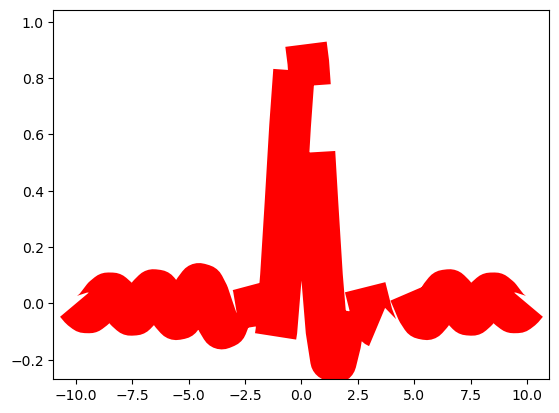

In [30]:
plt.plot(x, y, 'r-.', lw = 30)

## 4 如果畫個參數式圖形

其實參數式圖形基本上也是一堆 x, y 的座標, 只是 x(t), y(t) 都是 t 的函數, 我們可以想成 t 是時間。

假設我們的

$$ -2\pi \leq t \leq 2\pi$$

要畫個半徑是 r 的圓, x(t), y(t) 就是這樣:

* $x(t) = r\cos(t)$
* $y(t) = r\sin(t)$

我們來試試事情是不是如我們想的這樣...

In [32]:
r = 3
t = np.linspace(-2*np.pi, 2*np.pi, 200 )

In [34]:
x = r*np.cos(t)
y = r*np.sin(t)#circle

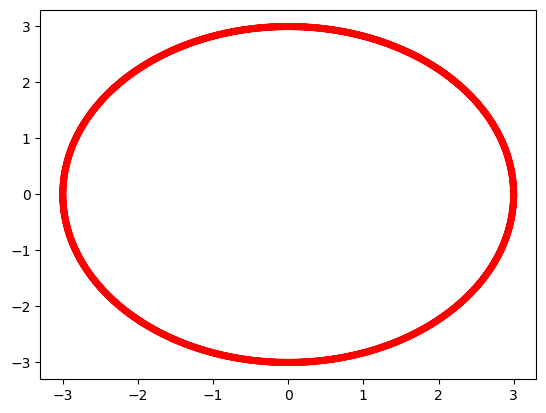

In [35]:
plt.plot(x, y, 'r', lw = 5)

真的成功了... 等等, `matplotlib` 怎麼畫成橢圓呢? 我們來調整一下。

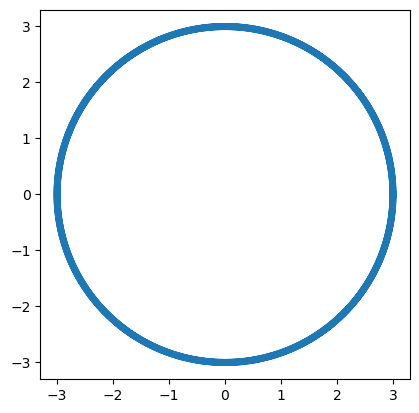

In [37]:
ax = plt.gca()
ax.set_aspect('equal')
plt.plot(x, y, lw = 5)

再來我們可以想一下, 如果 r 不是故定的呢? 也就是它會變長變短, 是不是會畫出很多特別的圖呢? 其實很多特別的曲線不過就是找個試合的 r(t), 我們來隨意試試看。

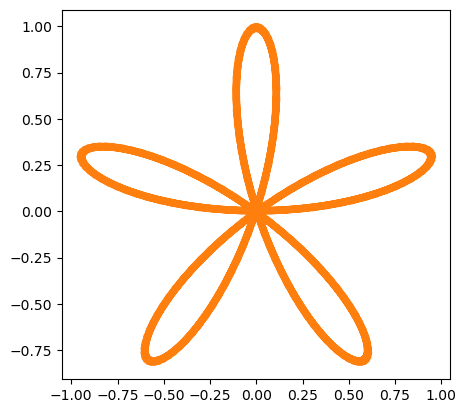

In [41]:
r = np.sin(5*t)
x = r*np.cos(t)
y = r*np.sin(t)#circle
plt.plot(x, y, lw = 2)

ax = plt.gca()
ax.set_aspect('equal')
plt.plot(x, y, lw = 5)

是不是很有意思呢? 你也可以自己試試不同的變化。

## 5 `subplot` 畫多個圖

我們每次畫圖的時候, `matplotlib` 就弄 1 個 figure 畫圖區出來, 裡面可以有很多子圖, 在 figure 裡叫 axes。目前我們都只有 1 個 figure 內含 1 張圖, 所以都不用設, 現在我想畫 4 張圖時。我們就要先想好「陣式」。

比如說 2x2 這樣排列的 4 張圖。

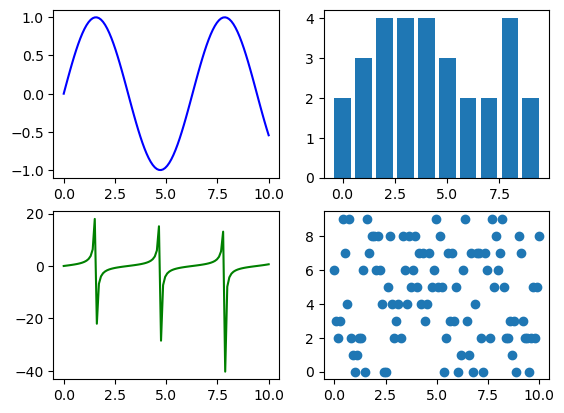

In [52]:
x = np.linspace(0, 10, 100)
plt.subplot(221)
#2 by 2, use 1st, mini graph

plt.plot(x, np.sin(x), c = 'b')

plt.subplot(222)
#2 by 2, use 2nd
plt.bar(range(10), np.random.randint(2, 5, 10))

plt.subplot(223)
#2 by 2, use 2nd
plt.plot(x, np.tan(x), c = 'g')

plt.subplot(224)
#2 by 2, use 2nd
plt.scatter(x, np.random.randint(0, 10, 100))

## 6 進階色彩*

#### 顏色表示法 1

    c = 'r' 

可以用 blue (b), green (g), red (r), cyan (c), magenta (m), yellow (y), black (k), white (w)


#### 顏色表示法 2

用一個 0 到 1 的數字表灰階, 越大越白。

    c = '0.6'
    
#### 顏色表示法 3

網頁常用的標準 16 進位 RGB 表示法。

    c = '#00a676'
    
我們怎知哪裡可選顏色呢? 可以用之前彥良介紹的 [Coolors.co](https://coolors.co) 等。
    
#### 顏色表示法 4

用 0-1 的數字表 RGB 也可以。

    c=(0.7, 0.4, 1)

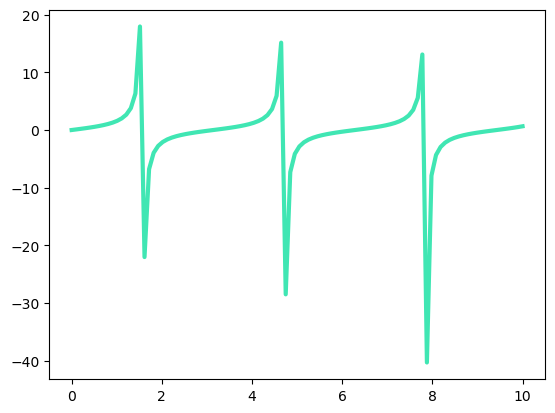

In [55]:

x = np.linspace(0, 10, 100)
y = np.tan(x)
plt.plot(x, y, c = (0.25, 0.9, 0.7), lw = 3)

## 7 Marker*

所謂 'marker' 就是原來的點, 我們特別標示出來, 為了不要讓圖形太複雜, 我們新換個點比較少的例子。

In [59]:
x = range(20)
y = np.random.randn(20)

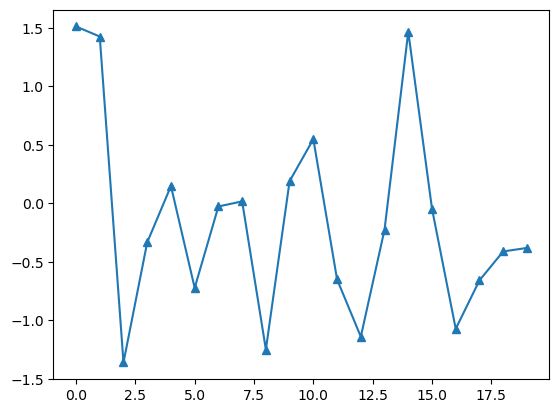

In [60]:
plt.plot(x, y, marker = '^')

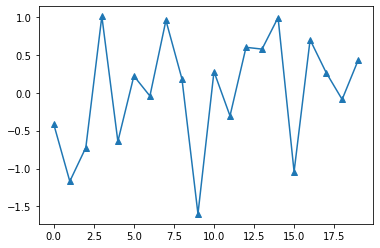

#### marker 可以設的參數

| 參數 | 說明 |
|---|---|
| `marker` | marker 的風格 |
| `markeredgecolor` (`mec`) | 邊線顏色 |
| `markeredgewidth` (`mew`) | 邊線寬度 |
| `markerfacecolor` (`mfc`) | marker 的顏色 |
| `markerfacecoloralt` (`mfcalt`) | marker 替換色 |
| `markersize` (`ms`) | marker 大小 |
| `markevery` | 隔多少畫一個 marker |

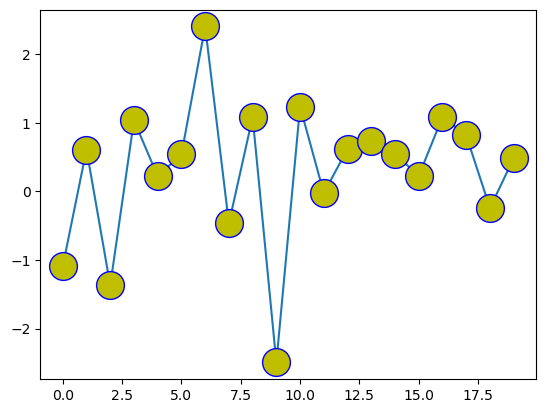

In [63]:
x = range(20)
y = np.random.randn(20)
plt.plot(x, y, marker = 'o', mec = 'b', mew = 1, mfc = 'y', ms = 20)

比較奇特的參數是 `markevery`, 這是說我們每多少筆資料要畫一個 marker。為了示範, 我們拿之前的例子來看看。

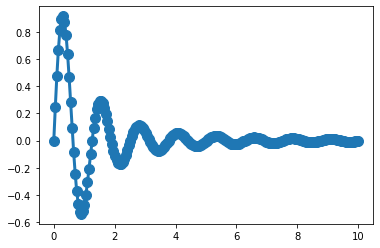

後面的完完全全連在一起了, 我們現在隔 10 個畫一個 marker 試試。

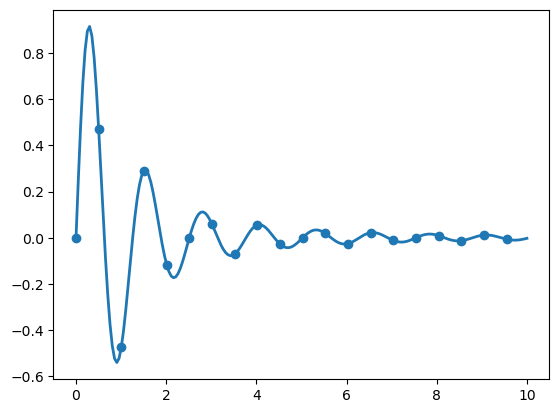

In [65]:
x = np.linspace(0, 10, 200)
y = np.sin(5*x)/(1+x*x)
plt.plot(x, y, lw = 2, marker = 'o', markevery = 10)

## 8 bar 風*

<BarContainer object of 5 artists>

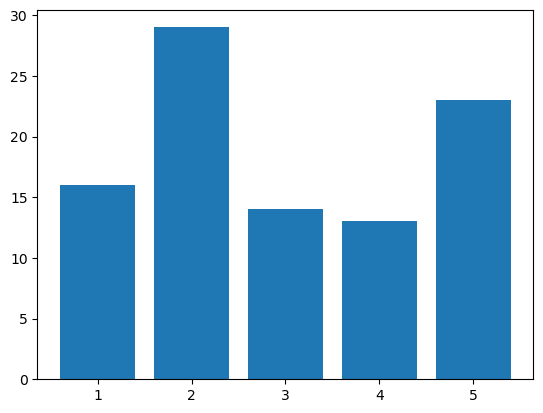

In [71]:
plt.bar(range(1, 6), np.random.randint(1, 30, 5))

移一點點。

<BarContainer object of 5 artists>

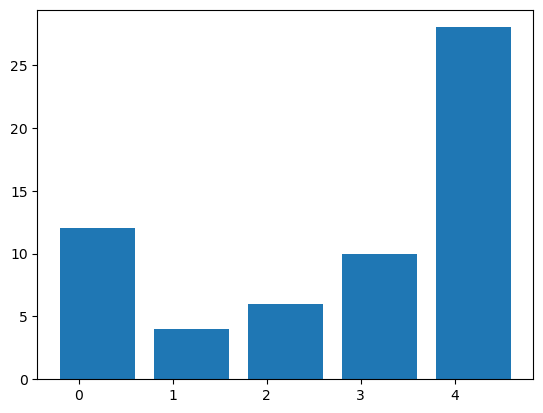

In [70]:
plt.bar(np.arange(0.2, 4.3), np.random.randint(1, 30, 5))

#### 雙色的長條圖

<BarContainer object of 5 artists>

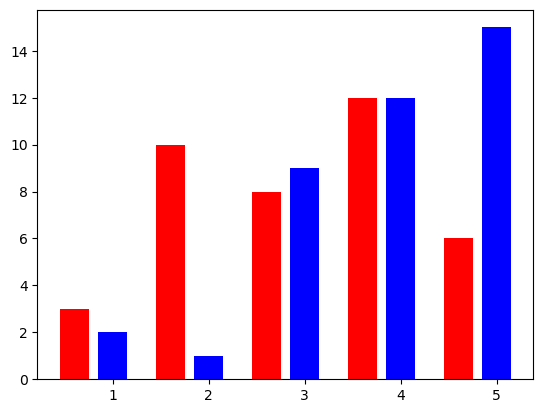

In [76]:
x = np.arange(1, 6)
plt.bar(x - 0.4, [3, 10, 8, 12, 6], width = 0.3, ec = 'none', fc = 'r')
plt.bar(x, [2, 1, 9, 12, 15], width = 0.3, ec = 'none', fc = 'b')

#### 疊加型的資料

<BarContainer object of 5 artists>

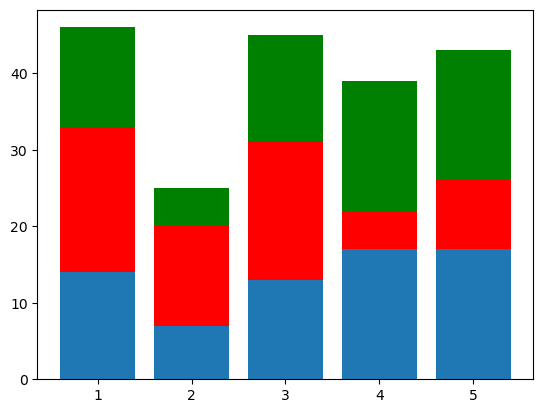

In [80]:
X = np.random.randint(4, 20, 5)
Y = np.random.randint(4, 20, 5)
Z = np.random.randint(4, 20, 5)
plt.bar(x, X)
plt.bar(x, Y, fc = "r", bottom = X)
plt.bar(x, Z, fc = "g", bottom = X+Y)

#### 橫放的長條圖

<BarContainer object of 5 artists>

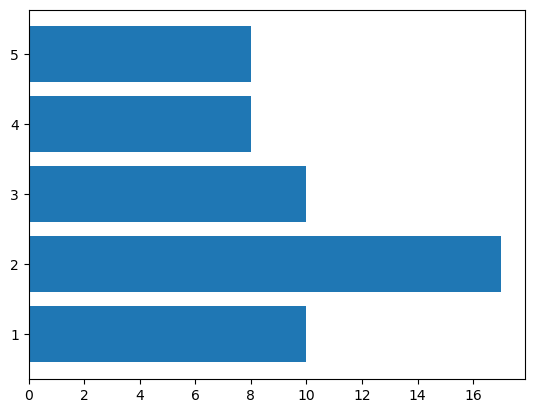

In [82]:
X = np.random.randint(4, 20, 5)
plt.barh(x, X)

#### 雙向的長條圖

Text(0.5, 1.0, 'Population')

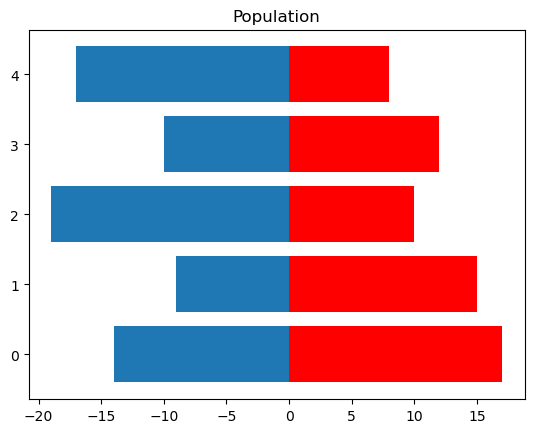

In [89]:
x = np.arange(0,5)
X = np.random.randint(4, 20, 5)
Y = np.random.randint(4, 20, 5)
plt.barh(x, -X)
plt.barh(x, Y, fc = "r")
plt.title("Population")

## 9 畫圖區的設定*

#### 說明文字的標示

Text(0, 0.5, 'height(m)')

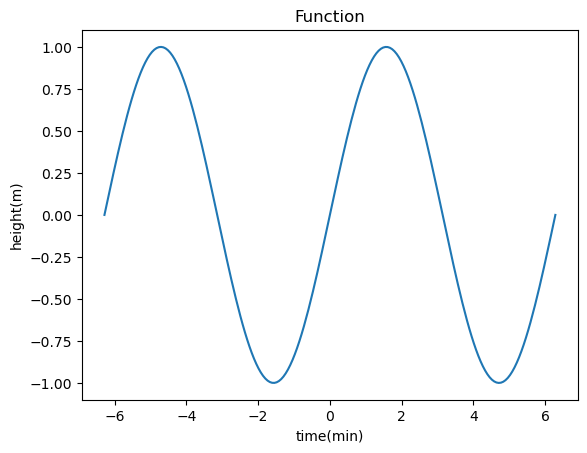

In [91]:
x = np.linspace(-2*np.pi, 2*np.pi, 200)
y = np.sin(x)
plt.plot(x, y)
plt.title("Function")
plt.xlabel("time(min)")
plt.ylabel("height(m)")

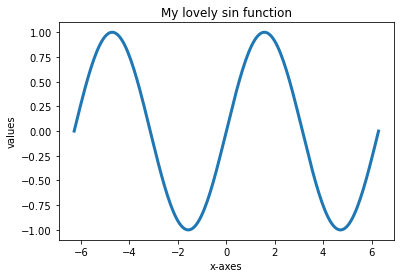

#### 邊界的設定

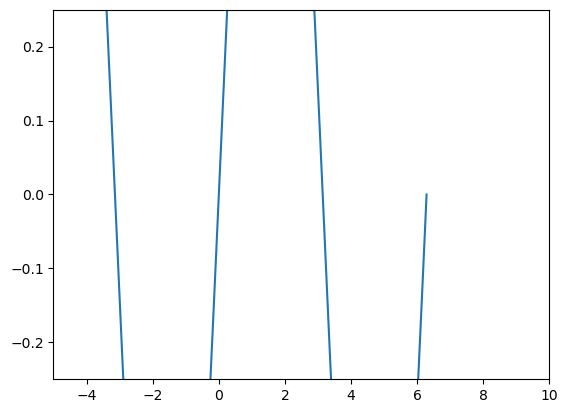

In [92]:
plt.xlim(-5, 10)
plt.ylim(-0.25, 0.25)
plt.plot(x, y)

#### xticks

([<matplotlib.axis.XTick at 0x19a4ce671c0>,
 [Text(0.0, 0, '0'),
  Text(1.5707963267948966, 0, 'pi/2'),
  Text(3.141592653589793, 0, 'pi'),
  Text(4.71238898038469, 0, '3pi/2'),
  Text(6.283185307179586, 0, '2pi')])

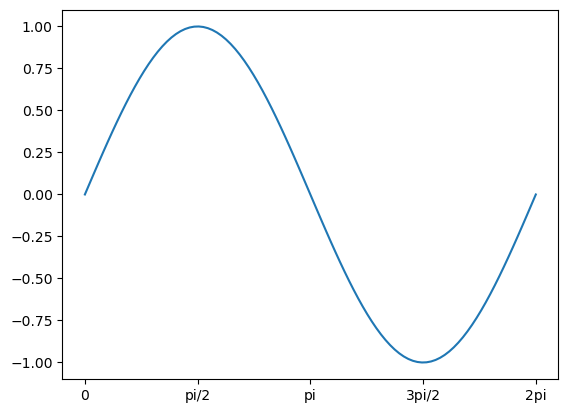

In [107]:
a = np.linspace(0, 2*np.pi, 100)
b = np.sin(a)
plt.plot(a, b)
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ['0','pi/2','pi','3pi/2','2pi'])

# [練習]自己生成測試數據，X軸xticks對應到y軸數值

例如: 1,2,3,4,5 對應X軸 '甲','乙'...

([<matplotlib.axis.XTick at 0x19a4cf2c340>,
 [Text(0, 0, 'zero'),
  Text(1, 0, 'one'),
  Text(2, 0, 'two'),
  Text(3, 0, 'three'),
  Text(4, 0, 'four'),
  Text(5, 0, 'five')])

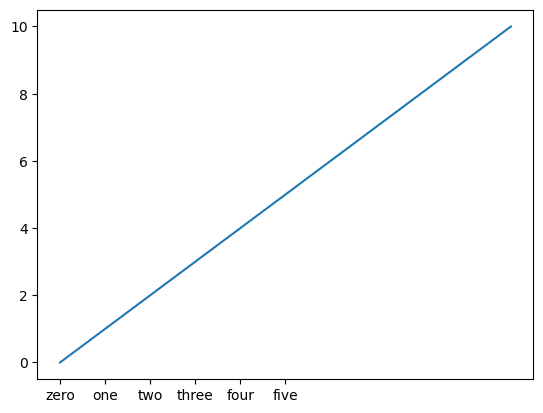

In [112]:
x = np.linspace(0, 10, 100)
y = x
plt.plot(x, y)
plt.xticks([0, 1, 2, 3, 4, 5], ["zero", "one", "two", "three", "four", "five"])

#### 圖例 legend

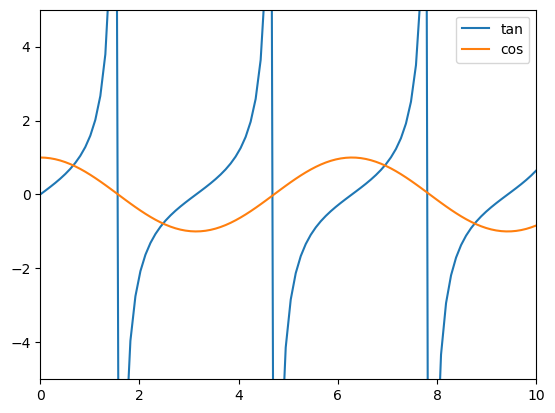

In [116]:
plt.xlim(-0, 10)
plt.ylim(-5, 5)
plt.plot(x, np.tan(x), label = "tan")
plt.plot(x, np.cos(x), label = "cos")
plt.legend(loc = 2)

可用 `loc` 去設圖例的位置, 依 1, 2, 3, ... 表示。

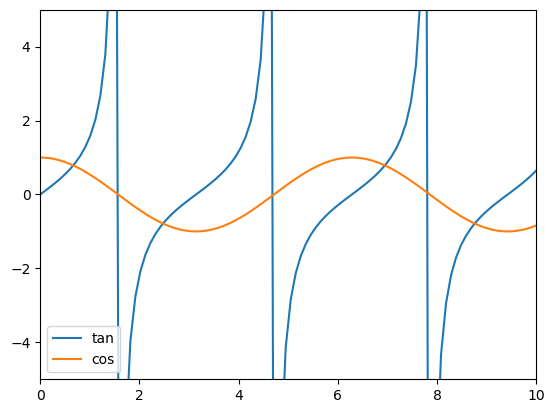

In [118]:
plt.xlim(-0, 10)
plt.ylim(-5, 5)
plt.plot(x, np.tan(x), label = "tan")
plt.plot(x, np.cos(x), label = "cos")
plt.legend(loc = 3)

## 10 取得現在工作中 axes*

我們有時要設 axes 的背景啦等等的資訊。這時就要取得現在工作中的 axes。這一般有兩種方式, 第一種是設 `subplot` 時可以取得:

    fig, ax = plt.subplot()
    
另一種是用 `gca` 函數:

    ax = plt.gca()

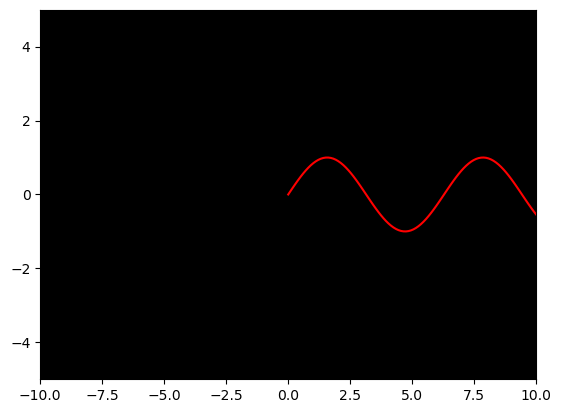

In [128]:

ax = plt.gca()
ax.set_facecolor("black")
ax.set_xlim(-10, 10)
ax.set_ylim(-5, 5)
plt.plot(x, np.sin(x), c = "r")

#### 移動 x, y 座標軸

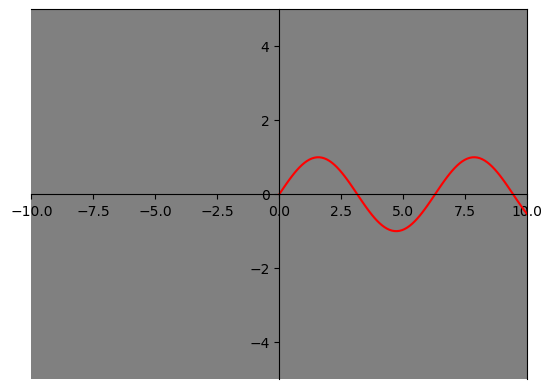

In [130]:
ax = plt.gca()
ax.set_facecolor("gray")
ax.set_xlim(-10, 10)
ax.set_ylim(-5, 5)
plt.plot(x, np.sin(x), c = "r")
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("data", 0))

## 11 耍寶可愛的 `xkcd`*

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

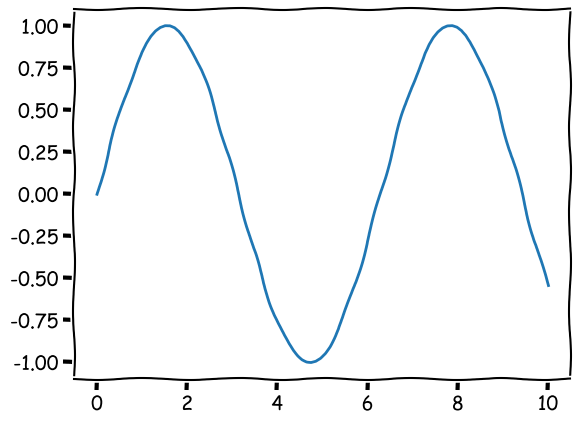

In [137]:
#我沒有font
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

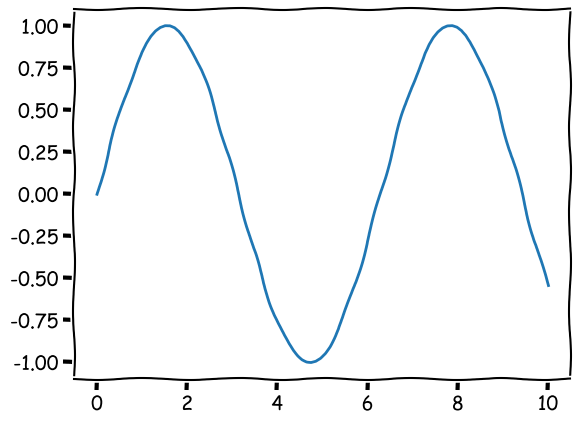

In [139]:
plt.xkcd()
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)

## 12 `seaborn` 大救星

雖然 `matplotlib` 幾乎什麼都可以調, 但有些簡單的調整卻要花費很多時間。於是有了許多可以協助 `matplotlib` 變美、變方便的套件出現。最近有個很有名的叫 `seaborn`, 儼然有另一個標準套件的態式。

最重要的是 `seaborn` 和我們未來要介紹的 `pandas` 配合得非常好, 雖然熊貓和海生的聽來就沒什麼關係...

我們先來個標準 (又來標準縮寫) 讀入 `seaborn` 的方法。

In [140]:
import seaborn as sns
plt.rcdefaults()

然後像平常畫個圖。

In [88]:
sns.set(color_codes = True)

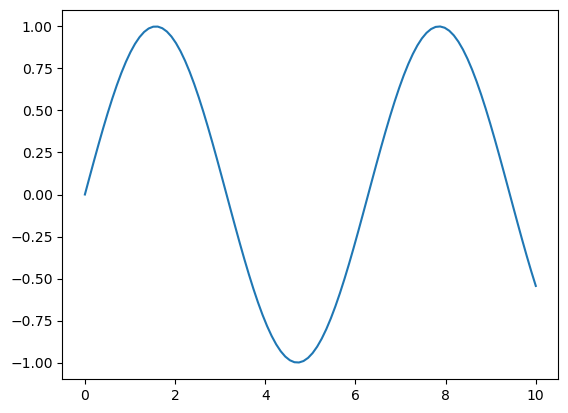

In [143]:
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)

傑克, 這真是太神奇了!

總之, 你根本就直接用原來 `matplotlib` 的指令, 馬上 `seaborn` 就會幫你美化。當然我們還是可以做更多的控制, 詳情請參考

[seaborn 的網站](https://seaborn.github.io/)